# Importando as bibliotecas básicas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importando o dataset

In [2]:
dados = pd.read_csv(r'/Users/pedro.alves/Documents/Pessoal/PA Analytics/Cursos/Python para Data Science e Analytics/Curso/V2.0/Materiais/3 - Modulo Avançado/Aula 3 - Árvore de Decisão/house_prices.csv')

# Olhando para os dados

In [3]:
dados

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


Vamos fazer uma previsão da coluna Sale Condition, que no caso configura o problema como uma classificação

In [20]:
dados.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
class_names = list(dados.SaleCondition.unique())

In [5]:
class_names

['Normal', 'Abnorml', 'Partial', 'AdjLand', 'Alloca', 'Family']

Iremos preencher os dados nulos para cara coluna devido a termos uma quantidade significativa de nulos na base

In [6]:
colunas = dados.dtypes.reset_index()

cont_cols = colunas[colunas[0] != 'object']['index'].to_list()


# Preenchendo as variáveis com dados nulos com a média


for i in cont_cols:
    dados[i] = dados[i].fillna(dados[i].mean())

In [7]:
dados.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,22.024023,9981.264932,1.382997,1.112799,30.202904,20.645407,180.569112,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,70.049958,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Aplicando o Label Encoder

In [8]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

colunas = dados.dtypes.reset_index()

categ_cols = colunas[colunas[0] == 'object']['index'].to_list()


# Preenchendo as variáveis com dados nulos com a média


for i in categ_cols:
    dados[str(i) +'_encoded'] = le.fit_transform(dados[i])
    dados = dados.drop(i,axis = 1)


In [9]:
dados

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageType_encoded,GarageFinish_encoded,GarageQual_encoded,GarageCond_encoded,PavedDrive_encoded,PoolQC_encoded,Fence_encoded,MiscFeature_encoded,SaleType_encoded,SaleCondition_encoded
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,1,1,4,4,2,3,4,4,8,4
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,1,1,4,4,2,3,4,4,8,4
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,1,1,4,4,2,3,4,4,8,4
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,5,2,4,4,2,3,4,4,8,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,1,1,4,4,2,3,4,4,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,1,1,4,4,2,3,4,4,8,4
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,1,2,4,4,2,3,2,4,8,4
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,1,1,4,4,2,3,0,2,8,4
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,1,2,4,4,2,3,4,4,8,4


# Quebrando o dataset para modelagem

In [10]:
from sklearn.model_selection import train_test_split

x = dados.drop('SaleCondition_encoded', axis = 1)
y = dados['SaleCondition_encoded']

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3, random_state=42)

# Carregando o modelo

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


modelo = DecisionTreeClassifier(max_depth=10, max_leaf_nodes=20, criterion='gini')

modelo.fit(x_train, y_train)
y_pred_train = modelo.predict(x_train)
y_pred_test = modelo.predict(x_test)

print(accuracy_score(y_train,y_pred_train))

0.9422700587084148


Verificando o resultado do teste

In [12]:
print(accuracy_score(y_test,y_pred_test))

0.8515981735159818


<AxesSubplot:>

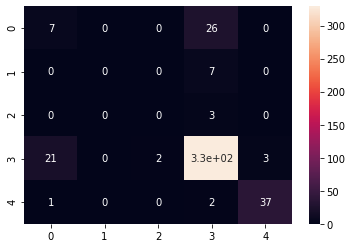

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

sns.heatmap(confusion_matrix(y_test,y_pred_test),annot=True)

Fazendo uma tentativa de variar os parâmetros da árvore

In [14]:
depth = [10, 50, 100, 500]
leaf = [20, 50, 100, 500]

for i,j in zip(depth, leaf):

    print('Depth = ', i)
    print('Leaf = ', j)
    modelo = DecisionTreeClassifier(max_depth=i, max_leaf_nodes=j, random_state=42)
    modelo.fit(x_train, y_train)
    y_pred_train = modelo.predict(x_train)
    y_pred_test = modelo.predict(x_test)

    print('Score de Treino é :',accuracy_score(y_train,y_pred_train))
    print('Score de Teste é :',accuracy_score(y_test,y_pred_test))



Depth =  10
Leaf =  20
Score de Treino é : 0.9422700587084148
Score de Teste é : 0.8493150684931506
Depth =  50
Leaf =  50
Score de Treino é : 0.9716242661448141
Score de Teste é : 0.8264840182648402
Depth =  100
Leaf =  100
Score de Treino é : 1.0
Score de Teste é : 0.815068493150685
Depth =  500
Leaf =  500
Score de Treino é : 1.0
Score de Teste é : 0.815068493150685


O Modelo performou melhor por volta de 100 nos parâmetros testados. É possível notar um Overfitting para parâmetros com valores muito elevados

# Como Visualizar o Modelo

Score de Treino é : 0.9217221135029354
Score de Teste é : 0.8744292237442922


[Text(797.1428571428571, 978.48, 'SaleType_encoded <= 7.5\ngini = 0.308\nsamples = 1022\nvalue = [68, 4, 5, 17, 843, 85]\nclass = Alloca'),
 Text(637.7142857142857, 761.0400000000001, 'YearBuilt <= 2003.5\ngini = 0.51\nsamples = 129\nvalue = [22, 0, 0, 1, 21, 85]\nclass = Family'),
 Text(478.2857142857142, 543.6, 'Exterior2nd_encoded <= 13.5\ngini = 0.523\nsamples = 42\nvalue = [21, 0, 0, 1, 20, 0]\nclass = Normal'),
 Text(318.85714285714283, 326.1600000000001, 'BsmtUnfSF <= 154.0\ngini = 0.49\nsamples = 32\nvalue = [20, 0, 0, 1, 11, 0]\nclass = Normal'),
 Text(159.42857142857142, 108.72000000000003, 'gini = 0.43\nsamples = 11\nvalue = [2, 0, 0, 1, 8, 0]\nclass = Alloca'),
 Text(478.2857142857142, 108.72000000000003, 'gini = 0.245\nsamples = 21\nvalue = [18, 0, 0, 0, 3, 0]\nclass = Normal'),
 Text(637.7142857142857, 326.1600000000001, 'gini = 0.18\nsamples = 10\nvalue = [1, 0, 0, 0, 9, 0]\nclass = Alloca'),
 Text(797.1428571428571, 543.6, 'gini = 0.045\nsamples = 87\nvalue = [1, 0, 0, 

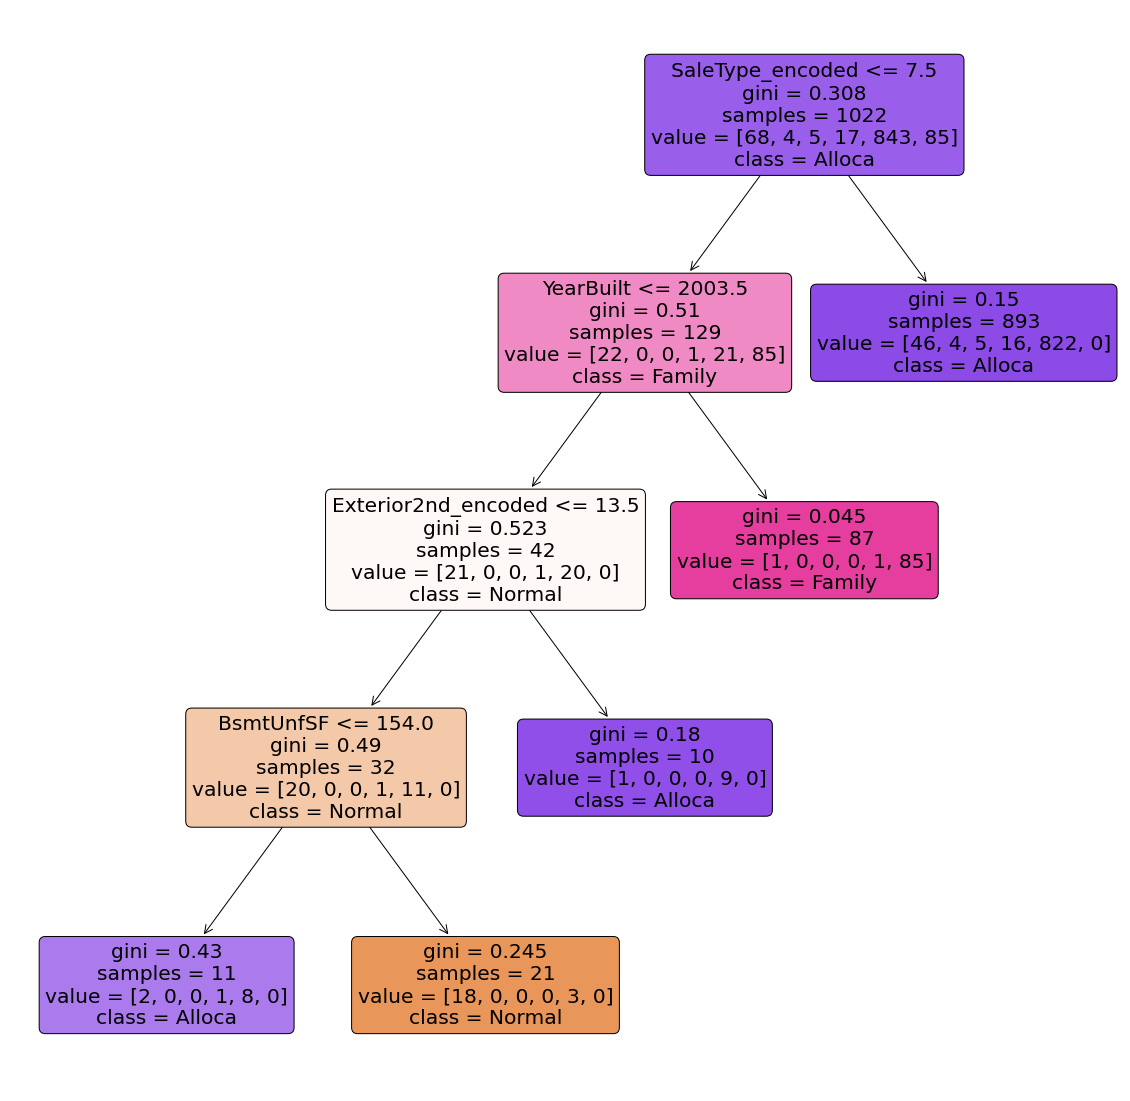

In [15]:
from sklearn.tree import plot_tree

modelo = DecisionTreeClassifier(max_depth=5, max_leaf_nodes=5, random_state=42)
modelo.fit(x_train, y_train)
y_pred_train = modelo.predict(x_train)
y_pred_test = modelo.predict(x_test)

print('Score de Treino é :',accuracy_score(y_train,y_pred_train))
print('Score de Teste é :',accuracy_score(y_test,y_pred_test))

plt.figure(figsize=(20,20))


plot_tree(modelo, feature_names = x.columns, rounded = True, filled=True, class_names =  class_names)